# 逻辑回归从零开始实现

In [1]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

## 1 人工构造数据集

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1
print('y.size', type(y))

y.size <class 'numpy.ndarray'>


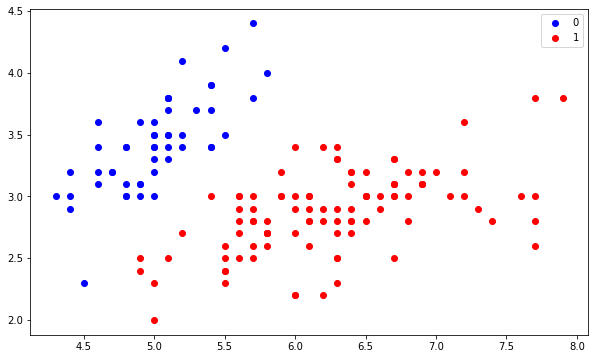

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

## 2 模型

In [4]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

## 3 定义模型

In [5]:
model = LogisticRegression(lr=0.1, num_iter=100)

## 4 开始训练

In [6]:
%time model.fit(X, y)
preds = model.predict(X)
(preds == y).mean()

Wall time: 14 ms


0.9533333333333334

## 5 定义

In [7]:

model.theta

array([-0.17691977,  0.93377079, -1.42278509])

## 6 可视化

<a list of 6 text.Text objects>

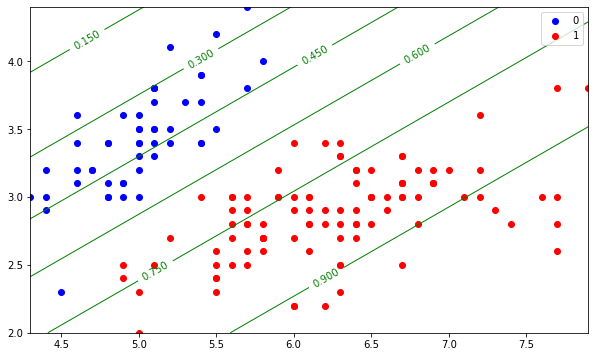

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()

x1_min, x1_max = X[:,0].min(), X[:,0].max(), # 4.3 7.9
x2_min, x2_max = X[:,1].min(), X[:,1].max(), # 2.0 4.4
space1 = np.linspace(x1_min, x1_max)
space2 = np.linspace(x2_min, x2_max)
xx1, xx2 = np.meshgrid(space1, space2)
# np.linspace(x1_min, x1_max) 的shape为 (50,)
# xx1, xx2 shape 为 (50,50)
# print('space1', space1)
# print('space2', space2)
# print('xx1', xx1)
# print('xx2', xx2)
ravel1 = xx1.ravel()
ravel2 = xx2.ravel()
grid = np.c_[ravel1, ravel2]
# print('ravel1.shape', ravel1.shape)
# print('ravel1', ravel1)
# print('ravel2.shape', ravel2.shape)
# print('ravel2', ravel2)
# print('grid', grid)
# grid 的shape为(2500, 2)
gridProb = model.predict_prob(grid)
probs = gridProb.reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='green');


## 7 时间

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1e20)
%time model.fit(X, y)
preds = model.predict(X)
(preds == y).mean()
model.intercept_, model.coef_

Wall time: 15.6 ms


(array([-276.67727716]), array([[ 134.80324426, -147.37951668]]))